In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()

file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

cleaned_data = data.dropna(subset=['country', 'province', 'variety'])
cleaned_data['price'] = cleaned_data['price'].fillna(cleaned_data['price'].median())
for col in ['designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']:
    cleaned_data[col] = cleaned_data[col].fillna("Unknown")

print(cleaned_data.shape)
print(cleaned_data.describe())
print(cleaned_data.dtypes)
print(cleaned_data.isnull().sum())

plt.hist(cleaned_data['price'], bins=30, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.countplot(y=cleaned_data['country'], order=cleaned_data['country'].value_counts().index[:10])
plt.title('Top 10 Countries')
plt.show()

sns.scatterplot(data=cleaned_data, x='price', y='points', alpha=0.5)
plt.title('Price vs Points')
plt.show()

top_countries = cleaned_data['country'].value_counts().index[:10]
sns.boxplot(data=cleaned_data[cleaned_data['country'].isin(top_countries)], x='country', y='points')
plt.title('Points by Country')
plt.xticks(rotation=45)
plt.show()

numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

top_varieties = cleaned_data['variety'].value_counts().index[:5]
grouped = cleaned_data[cleaned_data['variety'].isin(top_varieties)].groupby(['country', 'variety']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top Varieties by Country')
plt.ylabel('Count')
plt.show()

cleaned_data.to_csv('cleaned_wine_data.csv', index=False)
files.download('cleaned_wine_data.csv')


KeyboardInterrupt: 

<ipython-input-4-17bf38387213>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['price'] = cleaned_data['price'].fillna(cleaned_data['price'].median())
<ipython-input-4-17bf38387213>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = cleaned_data[col].fillna("Unknown")


(129907, 14)
                  id         points          price
count  129907.000000  129907.000000  129907.000000
mean    64984.283118      88.447051      34.651081
std     37518.881860       3.040078      39.673045
min         0.000000      80.000000       4.000000
25%     32491.500000      86.000000      18.000000
50%     64985.000000      88.000000      25.000000
75%     97475.500000      91.000000      40.000000
max    129970.000000     100.000000    3300.000000
id                         int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object
id                       0
country                  

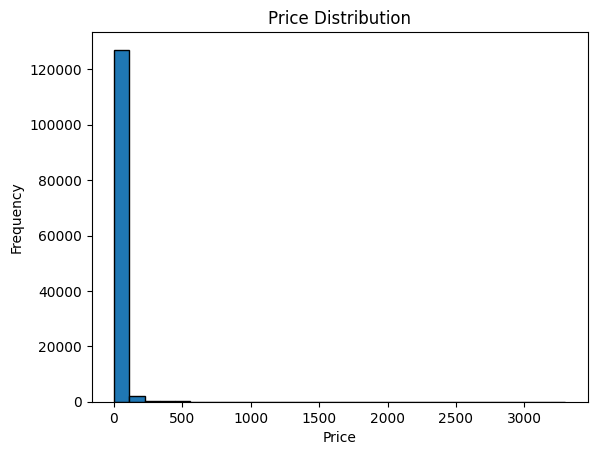

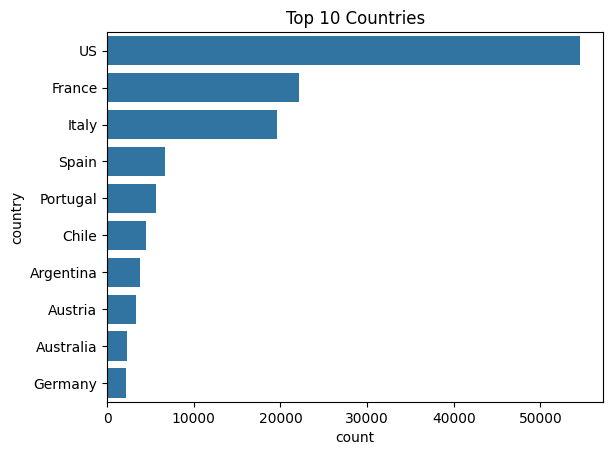

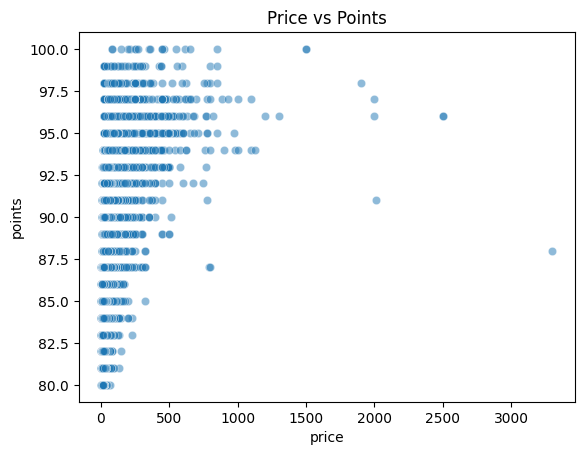

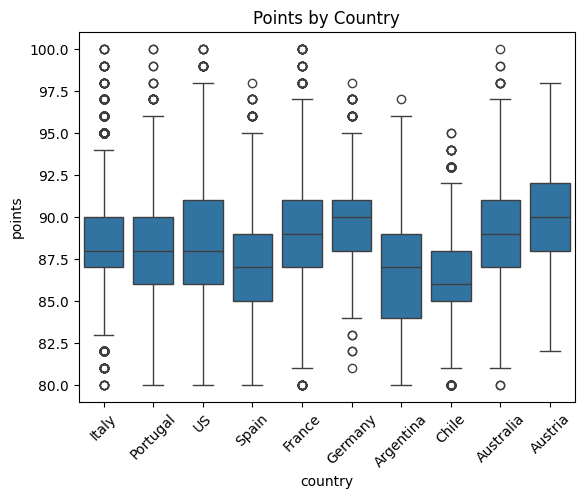

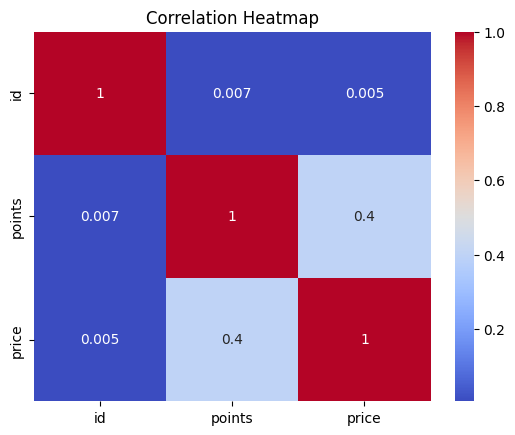

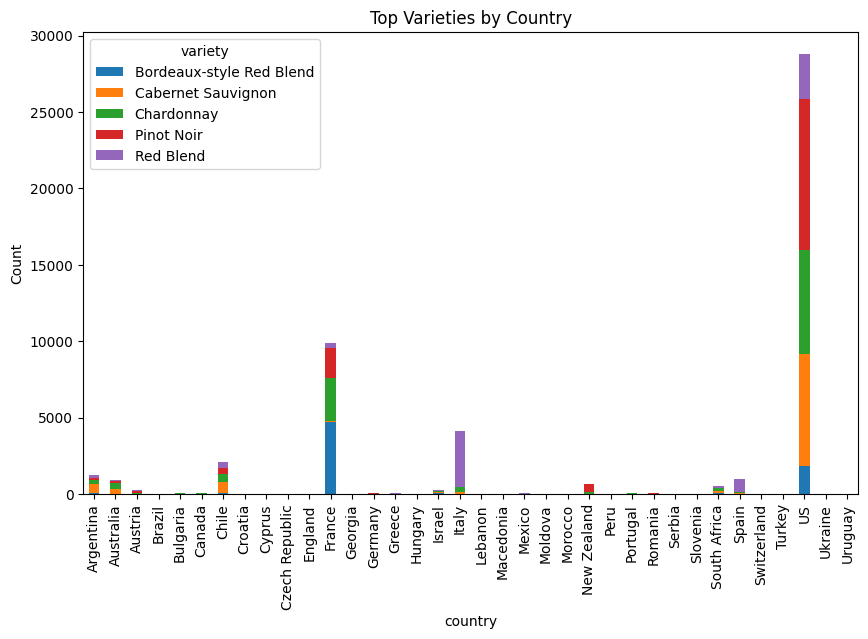

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/winemag-data-130k-v2.csv'

data = pd.read_csv(file_path)

cleaned_data = data.dropna(subset=['country', 'province', 'variety'])
cleaned_data['price'] = cleaned_data['price'].fillna(cleaned_data['price'].median())
for col in ['designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']:
    cleaned_data[col] = cleaned_data[col].fillna("Unknown")

print(cleaned_data.shape)
print(cleaned_data.describe())
print(cleaned_data.dtypes)
print(cleaned_data.isnull().sum())

plt.hist(cleaned_data['price'], bins=30, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.countplot(y=cleaned_data['country'], order=cleaned_data['country'].value_counts().index[:10])
plt.title('Top 10 Countries')
plt.show()

sns.scatterplot(data=cleaned_data, x='price', y='points', alpha=0.5)
plt.title('Price vs Points')
plt.show()

top_countries = cleaned_data['country'].value_counts().index[:10]
sns.boxplot(data=cleaned_data[cleaned_data['country'].isin(top_countries)], x='country', y='points')
plt.title('Points by Country')
plt.xticks(rotation=45)
plt.show()

numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

top_varieties = cleaned_data['variety'].value_counts().index[:5]
grouped = cleaned_data[cleaned_data['variety'].isin(top_varieties)].groupby(['country', 'variety']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top Varieties by Country')
plt.ylabel('Count')
plt.show()

cleaned_data.to_csv('cleaned_wine_data.csv', index=False)
